### Descriptive Analytic Model of Restaurant Billing & Tips Data

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [6]:
df = pd.read_csv('tips.csv')
df.sample(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
69,69,15.01,2.09,Male,Yes,Sat,Dinner,2
3,3,23.68,3.31,Male,No,Sun,Dinner,2
27,27,12.69,2.00,Male,No,Sat,Dinner,2
134,134,18.26,3.25,Female,No,Thur,Lunch,2
94,94,22.75,3.25,Female,No,Fri,Dinner,2


In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df.sample(3)

,total_bill,tip,sex,smoker,day,time,size
153,24.55,2.0,Male,No,Sun,Dinner,4
215,12.90,1.1,Female,Yes,Sat,Dinner,2
162,16.21,2.0,Female,No,Sun,Dinner,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [44]:
for i in df.columns:
    print(i,df[i].unique())
    print("==================")
    print(df[i].value_counts())
    print("==================")
    print("-----------------------------------------")

total_bill [16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59

In [17]:
print(df.describe())

d ='''

total_bill:
        mean --> 20 $
        min --> 3 $
        max --> 51 $
tips:
    mean --> 3 $
    min --> 1 $
    max --> 10 $
size:
    mean --> 2 - 3 pax
    min --> 1 pax
    max --> 6 pax

'''

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [12]:
df.isnull().sum() # no null value

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
print(df.groupby('sex').describe().T)

d = '''

total_bill :
    1. Male count(157) > Female count(87)
    2. Male mean = 20 , female =18
    3. min total bill male = 9 $, min total bill female = 3 $
    4. max total bill male = 50 $, max total bill female = 44 $
    
tips :
    1. Male count(157) > Female count(87)
    2. Male mean = 3 $ , female = 3 &
    3. min tips male = 1 $, min ttips female = 1 $
    4. max tips male = 10 $, max tips female = 6.5 $
    
size :
    1. Male count(157) > Female count(87)
    2. Male mean = 3 pax , female = 3 pax
    3. min size male = 1 pax, min size female = 1 pax
    4. max size male = 6 pax, max size female = 6 pax
    
    
Conclusion : Male have given more tips and have more total_bill value than female
             Size(individual or group) is almost same.
'''

sex                  Female        Male
total_bill count  87.000000  157.000000
           mean   18.056897   20.744076
           std     8.009209    9.246469
           min     3.070000    7.250000
           25%    12.750000   14.000000
           50%    16.400000   18.350000
           75%    21.520000   24.710000
           max    44.300000   50.810000
tip        count  87.000000  157.000000
           mean    2.833448    3.089618
           std     1.159495    1.489102
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.750000    3.000000
           75%     3.500000    3.760000
           max     6.500000   10.000000
size       count  87.000000  157.000000
           mean    2.459770    2.630573
           std     0.937644    0.955997
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.000000    2.000000
           75%     3.000000    3.000000
           max     6.000000    6.000000


In [30]:
print(df.groupby('smoker').describe().T)

d = '''

Somker:
    total_bill :
        1. Somker count(93) < Non-Somker count(151)
        2. Somker mean = 21 $ , Non-Somker =19 $
        3. min total bill Somker = 3 $, min total bill Non-Somker = 7 $
        4. max total bill Somker = 51 $, max total bill Non-Somker = 48 $

    tips :
        1.Somker count(93) < Non-Somker count(151)
        2. Somker mean = 3 $ , Non-Somker =3 $
        3. min tips Somker = 1 $, min tips Non-Somker = 1 $
        4. max tips Somker = 10 $, max tips Non-Somker = 9 $
        
    size :
        1. Somker count(93) < Non-Somker count(151)
        2. Somker mean = 2  , Non-Somker =3
        3. min size Somker = 1 pax, min size Non-Somker = 1 pax
        4. max size Somker = 5 $, max size Non-Somker = 6 $
        
Conclusion:
        Non somker crowd is more than smoker
        total bill of smoker is more
        tips is not dependent on smoker or non smoker
        size of smoker is less
'''

smoker                    No        Yes
total_bill count  151.000000  93.000000
           mean    19.188278  20.756344
           std      8.255582   9.832154
           min      7.250000   3.070000
           25%     13.325000  13.420000
           50%     17.590000  17.920000
           75%     22.755000  26.860000
           max     48.330000  50.810000
tip        count  151.000000  93.000000
           mean     2.991854   3.008710
           std      1.377190   1.401468
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      2.740000   3.000000
           75%      3.505000   3.680000
           max      9.000000  10.000000
size       count  151.000000  93.000000
           mean     2.668874   2.408602
           std      1.017984   0.810751
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      2.000000   2.000000
           75%      3.000000   3.000000
           max      6.000000   5.000000


In [33]:
print(df.groupby('day').describe().T)

d = '''

1. Crowd is more on Saturday>Sunday>Thrusday>Friday
2. mean total bill Sunday>Saturday>Thrusday>Friday
3. min total bill Thrus>sun>fri>sat
4. max total bill Saturday>Sunday>Thrusday>Friday

1. mean tips sun > sat > thru >= fri
2. max tip  sat > thrus > sun > fri
3. min tip Thrus > same

1. mean size sun > st > thrus > fri
2. min size sunday(2) > same
3. max size sunday> thrus >sat > fri


'''


day                     Fri        Sat        Sun       Thur
total_bill count  19.000000  87.000000  76.000000  62.000000
           mean   17.151579  20.441379  21.410000  17.682742
           std     8.302660   9.480419   8.832122   7.886170
           min     5.750000   3.070000   7.250000   7.510000
           25%    12.095000  13.905000  14.987500  12.442500
           50%    15.380000  18.240000  19.630000  16.200000
           75%    21.750000  24.740000  25.597500  20.155000
           max    40.170000  50.810000  48.170000  43.110000
tip        count  19.000000  87.000000  76.000000  62.000000
           mean    2.734737   2.993103   3.255132   2.771452
           std     1.019577   1.631014   1.234880   1.240223
           min     1.000000   1.000000   1.010000   1.250000
           25%     1.960000   2.000000   2.037500   2.000000
           50%     3.000000   2.750000   3.150000   2.305000
           75%     3.365000   3.370000   4.000000   3.362500
           max     4.730

In [35]:
(df.groupby('time').describe().T)

d = '''

1.Crowd is more on Dinner than lunch
2. mean total bill dinner > lunch
3. min total bill lunch > dinner
4. max total bill dinner > lunch

1. mean tips dinner > lunch
2. max tip  dinner > lunch
3. min tip lunch(1.25$) > dinner(1 $)

1. mean size dinner > lunch
2. min size same
3. max size same


'''


time                  Dinner      Lunch
total_bill count  176.000000  68.000000
           mean    20.797159  17.168676
           std      9.142029   7.713882
           min      3.070000   7.510000
           25%     14.437500  12.235000
           50%     18.390000  15.965000
           75%     25.282500  19.532500
           max     50.810000  43.110000
tip        count  176.000000  68.000000
           mean     3.102670   2.728088
           std      1.436243   1.205345
           min      1.000000   1.250000
           25%      2.000000   2.000000
           50%      3.000000   2.250000
           75%      3.687500   3.287500
           max     10.000000   6.700000
size       count  176.000000  68.000000
           mean     2.630682   2.411765
           std      0.910241   1.040024
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      2.000000   2.000000
           75%      3.000000   2.000000
           max      6.000000   6.000000

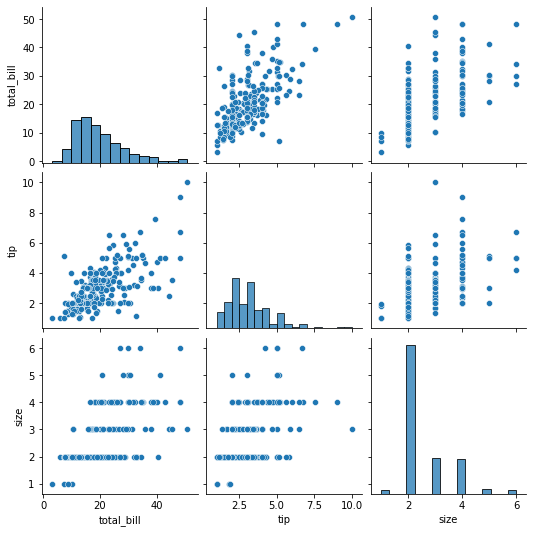

In [42]:
sns.pairplot(data=df)

# with total_bill tips is also increasing

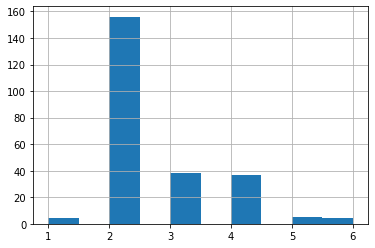

In [60]:
df[''].hist()

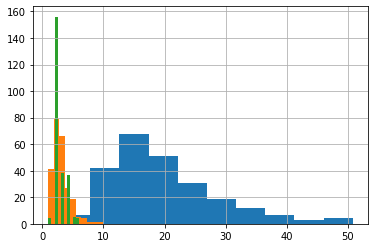

In [61]:
[(df[i].hist()) for i in df.columns if (df[i].dtype =='float64') or (df[i].dtype =='int64')]

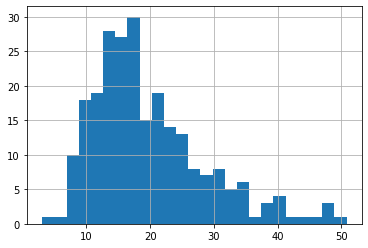

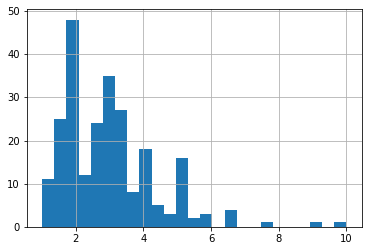

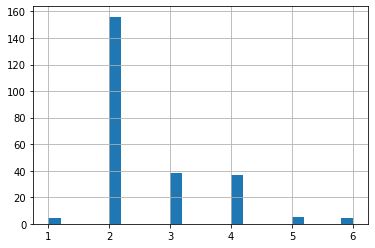

<Figure size 432x288 with 0 Axes>

In [64]:
for i in df.columns:
    if (df[i].dtype =='float64') or (df[i].dtype =='int64'):
        df[i].hist(bins=25)
        plt.figure()

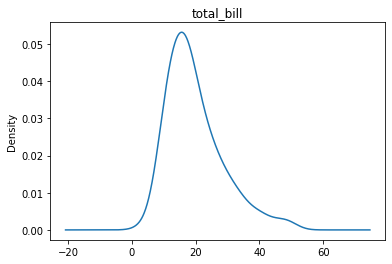

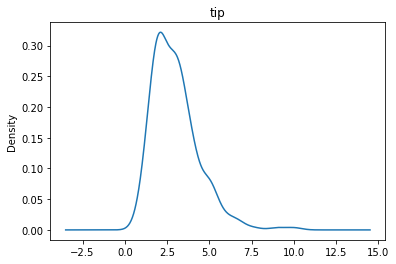

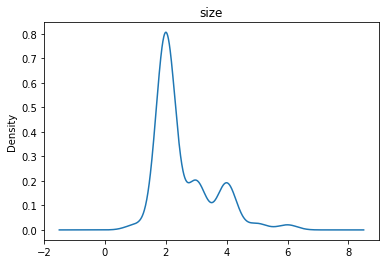

<Figure size 432x288 with 0 Axes>

In [70]:
for i in df.columns:
    if (df[i].dtype =='float64') or (df[i].dtype =='int64'):
        df[i].plot.kde()
        plt.title(i)
        plt.figure()
       

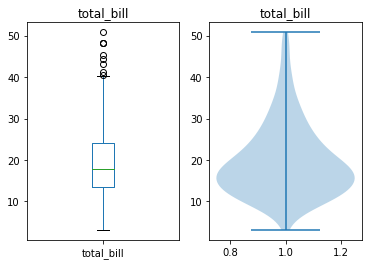

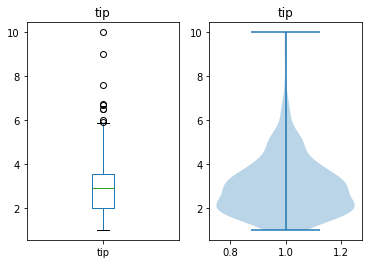

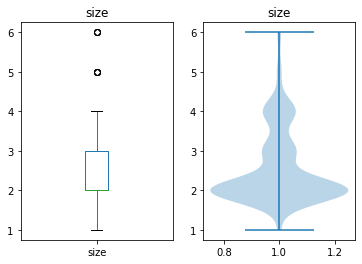

<Figure size 432x288 with 0 Axes>

In [85]:
for i in ['total_bill','tip','size']:
#     if (df[i].dtype =='float64') or (df[i].dtype =='int64'):  
#     plt.figure()
    plt.subplot(1,2,1)
    df[i].plot.box()
    plt.title(i)
    

    plt.subplot(1,2,2)
    plt.violinplot(df[i])
    plt.title(i)
    plt.figure()
        

In [86]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

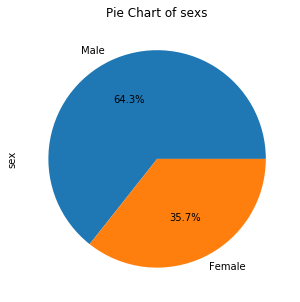

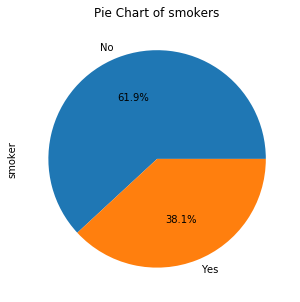

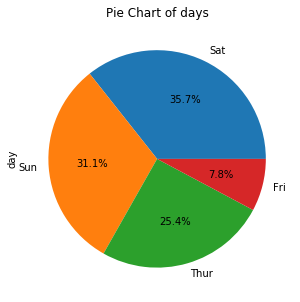

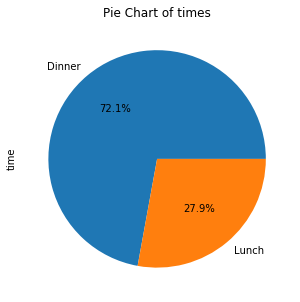

In [89]:
for i in ['sex','smoker','day','time']:
    plt.figure()
    df[i].value_counts().plot.pie(autopct = '%.1f%%',figsize=(5,5))
    plt.title('Pie Chart of {}s'.format(i))
    

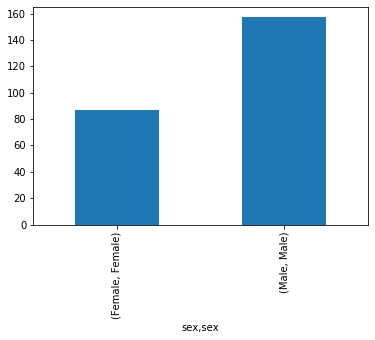

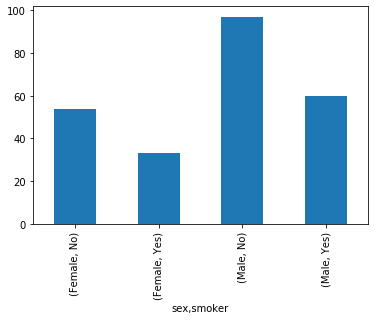

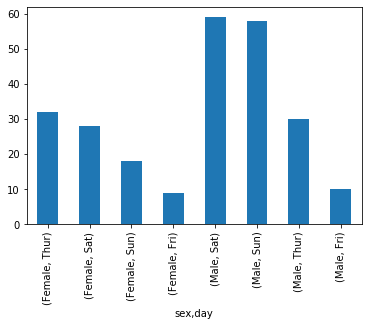

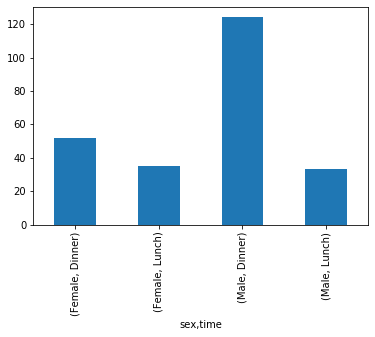

In [96]:
for i in ['sex','smoker','day','time']:
    plt.figure()
    df.groupby('sex')[i].value_counts().plot.bar()

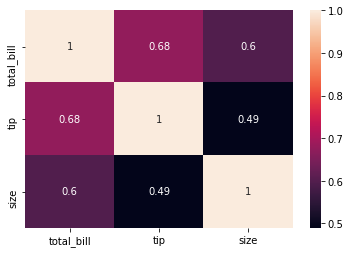

In [100]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1080x432 with 0 Axes>

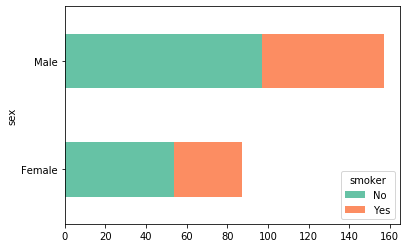

<Figure size 1080x432 with 0 Axes>

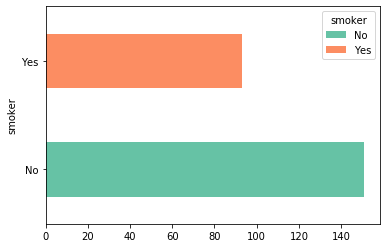

<Figure size 1080x432 with 0 Axes>

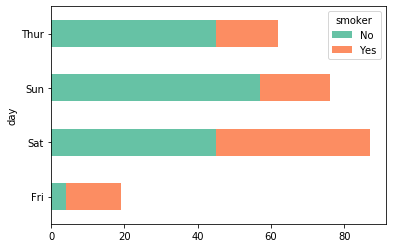

<Figure size 1080x432 with 0 Axes>

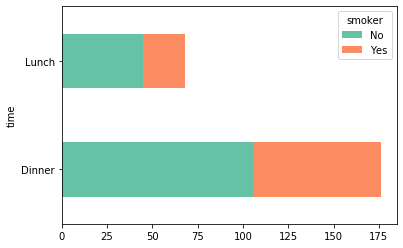

In [106]:
for i in ['sex','smoker','day','time']:
    sns.set_palette('Set2')
    plt.figure(figsize=(15,6))
    pd.crosstab(index=df[i],columns=df['smoker']).plot(kind='barh',stacked = True)